# LandLab Learning

This notebook is for investigating and getting used to the LandLab Python package for hydrology modelling.

I will broadly follow the guide on https://landlab.readthedocs.io/en/latest/user_guide

In [1]:
import numpy as np
import landlab as ldlb
import matplotlib.pyplot as plt

## Set up a model grid

... and add an idealised quadratic elevation profile to it, mimicking a valley.

In [2]:
from landlab import RasterModelGrid

In [5]:
#set up 40x40 grid
mg = RasterModelGrid((40, 40), 5.)

#let's try to add an idealised elevation profile to this grid.
valley = np.zeros((40,40))

def valleyfunc(x, y):
    e = (x-20)**2 + y
    return e

for x in np.arange(0, 40, 1):
    for y in np.arange(0, 40, 1):
        valley[y][x] = valleyfunc(x,y)

mg.add_field("elevation", valley, at="node", units="m", copy=True, clobber=True)

array([ 400.,  361.,  324., ...,  328.,  363.,  400.])

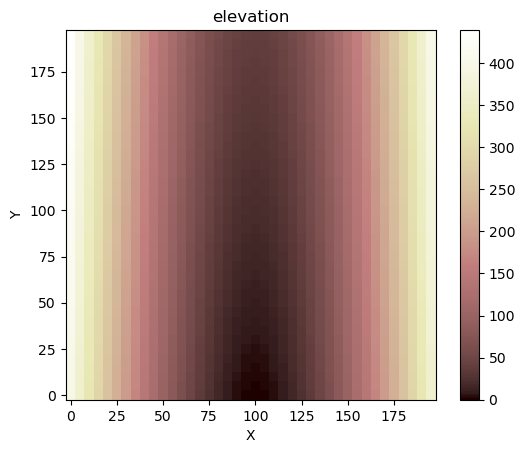

In [8]:
from landlab.plot.imshow import imshow_grid_at_node
#N.B. the Landlab user guide tells you to import the wrong component here

plt.figure('Elevations from the field')  # new fig, with a name
imshow_grid_at_node(mg, 'elevation')
plt.show()

We can also add some vegetation:

In [9]:
veg = mg.add_ones("percent_vegetation", at="cell")

Note that the vegetation is set up at the 'cell' level, while the elevation is set at the 'node' level. Nodes are the cell centres (meaning there is a well-defined way to calculate gradients between values at nodes of neighbouring cells), while 'cell' data lives uniformly across the entire volume of the cell. On a grid, there are fewer cells than nodes: the boundary rows do not count as cells.

For us, this probably means we want our Landlab grid to be two nodes larger in $x$ and $y$ than our NetLogo grid: This means they have the same number of cells, but the Landlab grid also has an additional rim of nodes around the outside that we can set boundary conditions on.